<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/ALAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Access to Code and Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
cd ../../

/content


In [26]:
ls

Adversarially-Learned-Anomaly-Detection/  drive/  sample_data/  train_logs/


In [27]:
!rm -rf Adversarially-Learned-Anomaly-Detection

In [28]:
!git clone https://github.com/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection

Cloning into 'Adversarially-Learned-Anomaly-Detection'...
remote: Enumerating objects: 1073, done.
remote: Counting objects: 100% (1007/1007), done.
remote: Compressing objects: 100% (778/778), done.
remote: Total 1073 (delta 521), reused 592 (delta 189), pack-reused 66
Receiving objects: 100% (1073/1073), 41.15 MiB | 12.49 MiB/s, done.
Resolving deltas: 100% (543/543), done.


# **Run Model**

In [29]:
cd /content/Adversarially-Learned-Anomaly-Detection/alad

/content/Adversarially-Learned-Anomaly-Detection/alad


In [30]:
ls

 arrhythmia_utilities.py  'loss discriminator.png'   run.py
 cifar10_utilities.py      __pycache__/              svhn_utilities.py
 kdd_utilities.py          results/


In [31]:
%tensorflow_version 1.x

In [33]:
!python run.py

Instructions for updating:
non-resource variables are not supported in the long term
start round  0
random seed =  0
Data loading...
Size of split train : 192
size of data :  (192, 274)
Size of split test : 226
size of data :  (226, 274)
(192, 274)
Building graph...
ALAD is training with the following parameters:
Number of Epochs:  1000
Batch size:  32
Degree for L norms:  2
Discriminator zz enabled:  True
Start training...
Epoch 0 | time = 1s | loss gen = 7185625770.6667 | loss enc = 7216586922.6667 | loss dis = 3207529237.3333 | loss dis xz = 3227563.9792 | loss dis xx = 3092797866.6667 | loss dis zz = 10221739.7917 | loss dis xxzz = 101281971.3333 |
Epoch 100 | time = 0s | loss gen = 1437850144.0000 | loss enc = 1481595029.3333 | loss dis = 6504004778.6667 | loss dis xz = 1212903.7760 | loss dis xx = 6397446314.6667 | loss dis zz = 13439198.0000 | loss dis xxzz = 91906434.0000 |
Epoch 200 | time = 0s | loss gen = 1881335658.6667 | loss enc = 1937243818.6667 | loss dis = 7536073386.6

# **Draw Dxxzz Network**

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


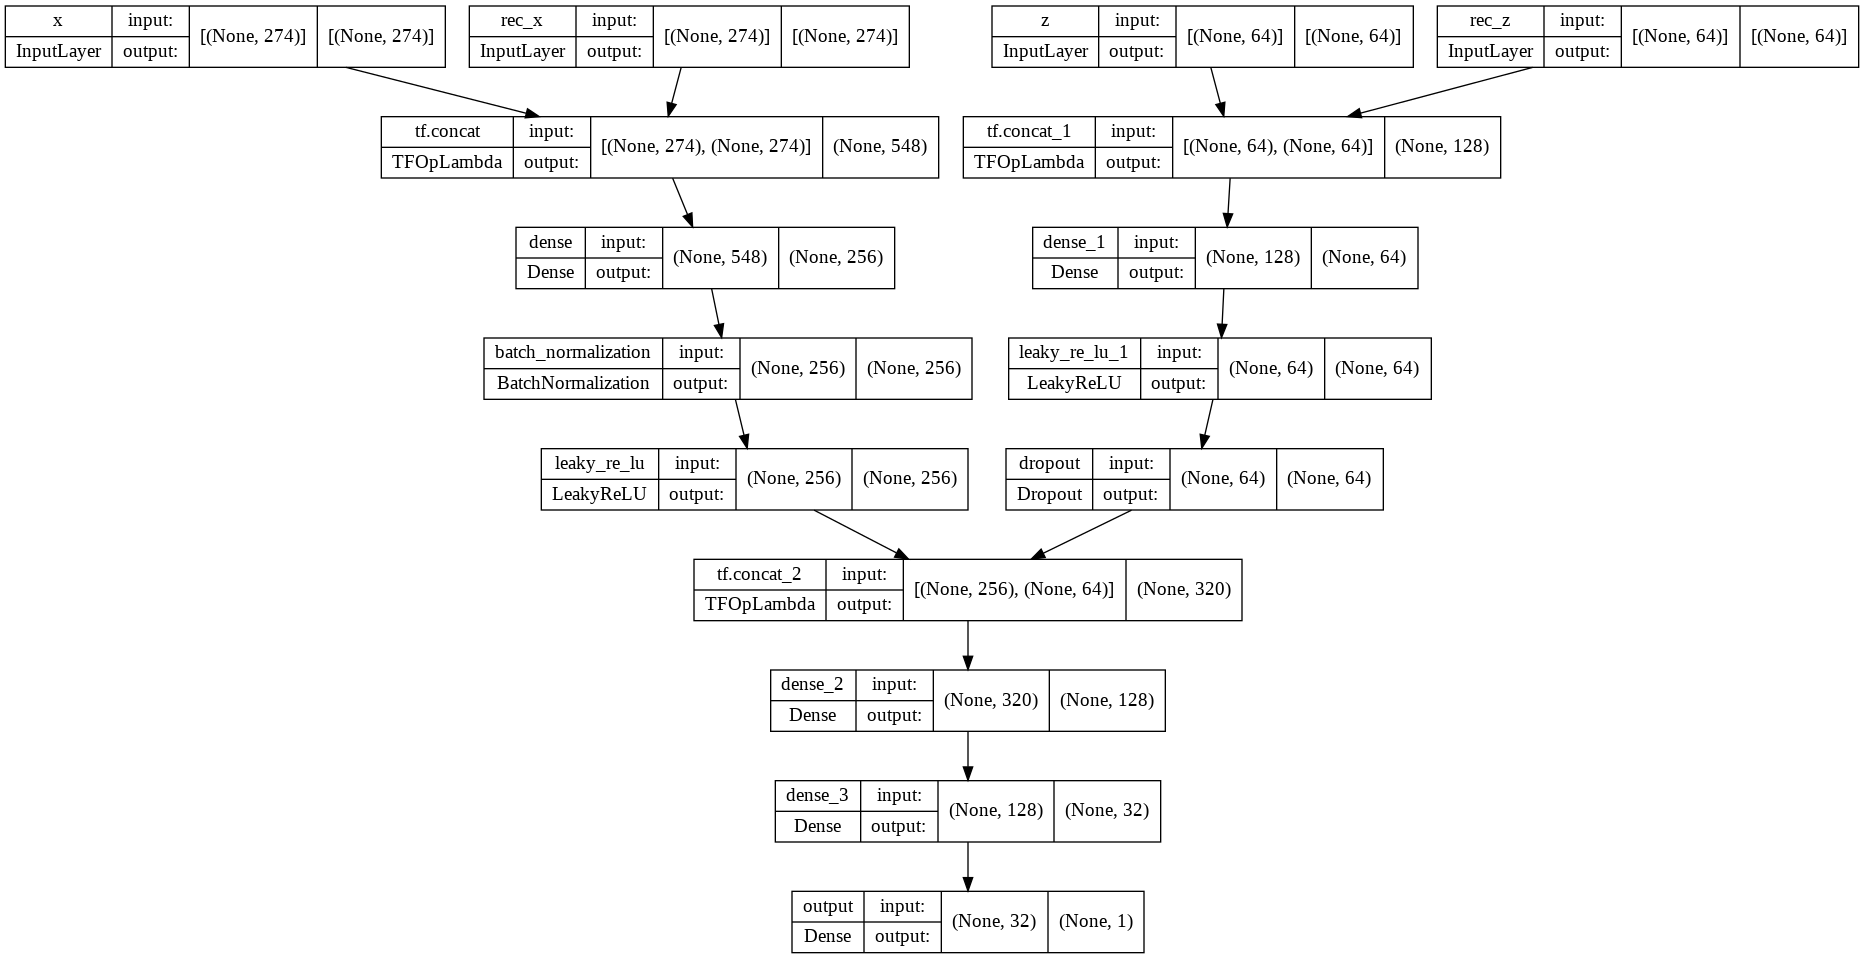

In [ ]:
import tensorflow as tf

x = tf.keras.Input(shape=(274,), dtype='int32', name='x')
rec_x = tf.keras.Input(shape=(274,), dtype='int32', name='rec_x')
z = tf.keras.Input(shape=(64,), dtype='int32', name='z')
rec_z = tf.keras.Input(shape=(64,), dtype='int32', name='rec_z')

concat_x = tf.concat([x, rec_x], axis=1)
x1 = tf.keras.layers.Dense(256)(concat_x)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.LeakyReLU()(x1)

concat_z = tf.concat([z, rec_z], axis=1)
z1 = tf.keras.layers.Dense(64)(concat_z)
z1 = tf.keras.layers.LeakyReLU()(z1)
z1 = tf.keras.layers.Dropout(0.5)(z1)

y = tf.concat([x1, z1], axis=1)
y = tf.keras.layers.Dense(128, activation='relu')(y)
y = tf.keras.layers.Dense(32, activation='relu')(y)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(y)

model = tf.keras.Model(inputs=[x,rec_x,z,rec_z], outputs=[output])

tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None, show_layer_activations=False)